<a href="https://colab.research.google.com/github/triasnugra/analisis/blob/main/modulsquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import files
import pandas as pd

# UPLOAADDDD
uploaded = files.upload()

# READ YAAAAAAAAAAA
file_name = list(uploaded.keys())[0]
data = pd.read_excel(file_name)

# Show Data PLZ
data


Saving data modul.xlsx to data modul (1).xlsx


,TUJUAN,TEMA,MATERI,TFP,WEB
0,5,5,4,3,3
1,5,5,4,3,3
2,5,5,3,1,2
3,4,4,2,1,1
4,5,5,2,1,1
5,5,5,3,2,2
6,5,4,2,1,1
7,4,4,2,1,2
8,5,5,3,1,3
9,5,4,2,1,1


In [15]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Fungsi untuk uji normalitas dengan interpretasi
def normalitas_test(data):
    p_values = {}
    interpretations = {}

    for column in data.columns:
        _, p_value = stats.shapiro(data[column])
        p_values[column] = p_value

        # Interpretasi berdasarkan nilai p
        if p_value > 0.05:
            interpretations[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values, interpretations

# Melakukan uji normalitas pada semua kolom
normalitas_result, interpretasi_result = normalitas_test(data)

# Menampilkan hasil uji normalitas
normalitas_result, interpretasi_result


({'TUJUAN': 1.1453193396913662e-10,
  'TEMA': 1.885280919761604e-10,
  'MATERI': 1.8470616704498307e-07,
  'TFP': 1.37986450155731e-09,
  'WEB': 1.0970427588608206e-07},
 {'TUJUAN': 'Data tidak terdistribusi normal (menolak H0)',
  'TEMA': 'Data tidak terdistribusi normal (menolak H0)',
  'MATERI': 'Data tidak terdistribusi normal (menolak H0)',
  'TFP': 'Data tidak terdistribusi normal (menolak H0)',
  'WEB': 'Data tidak terdistribusi normal (menolak H0)'})

In [17]:
import scipy.stats as stats
import numpy as np

# Fungsi untuk uji normalitas dengan alternatif lain
def alternative_normalitas_test(data):
    p_values_ks = {}
    p_values_ad = {}
    interpretations_ks = {}
    interpretations_ad = {}
    ad_statistics = {}

    for column in data.columns:
        # Uji Kolmogorov-Smirnov
        _, p_value_ks = stats.kstest(data[column], 'norm', args=(np.mean(data[column]), np.std(data[column])))
        p_values_ks[column] = p_value_ks
        if p_value_ks > 0.05:
            interpretations_ks[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ks[column] = "Data tidak terdistribusi normal (menolak H0)"

        # Uji Anderson-Darling
        result_ad = stats.anderson(data[column], dist='norm')
        ad_statistic = result_ad.statistic  # Statistik uji Anderson-Darling
        p_value_ad = result_ad.significance_level[2]  # Mengambil p-value untuk level 5%
        p_values_ad[column] = p_value_ad
        ad_statistics[column] = ad_statistic

        if p_value_ad > 0.05:
            interpretations_ad[column] = "Data terdistribusi normal (gagal menolak H0)"
        else:
            interpretations_ad[column] = "Data tidak terdistribusi normal (menolak H0)"

    return p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics

# Melakukan uji normalitas alternatif pada semua kolom
p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics = alternative_normalitas_test(data)

# Menampilkan hasil uji normalitas
p_values_ks, interpretations_ks, p_values_ad, interpretations_ad, ad_statistics


({'TUJUAN': 9.62940831108032e-09,
  'TEMA': 5.8347992781508727e-08,
  'MATERI': 0.0004258867549643621,
  'TFP': 6.005369576802016e-08,
  'WEB': 0.0011262504679590002},
 {'TUJUAN': 'Data tidak terdistribusi normal (menolak H0)',
  'TEMA': 'Data tidak terdistribusi normal (menolak H0)',
  'MATERI': 'Data tidak terdistribusi normal (menolak H0)',
  'TFP': 'Data tidak terdistribusi normal (menolak H0)',
  'WEB': 'Data tidak terdistribusi normal (menolak H0)'},
 {'TUJUAN': 5.0, 'TEMA': 5.0, 'MATERI': 5.0, 'TFP': 5.0, 'WEB': 5.0},
 {'TUJUAN': 'Data terdistribusi normal (gagal menolak H0)',
  'TEMA': 'Data terdistribusi normal (gagal menolak H0)',
  'MATERI': 'Data terdistribusi normal (gagal menolak H0)',
  'TFP': 'Data terdistribusi normal (gagal menolak H0)',
  'WEB': 'Data terdistribusi normal (gagal menolak H0)'},
 {'TUJUAN': 10.383519809872517,
  'TEMA': 9.908183051510562,
  'MATERI': 4.642676109158515,
  'TFP': 7.8181617733091215,
  'WEB': 4.816015616625123})

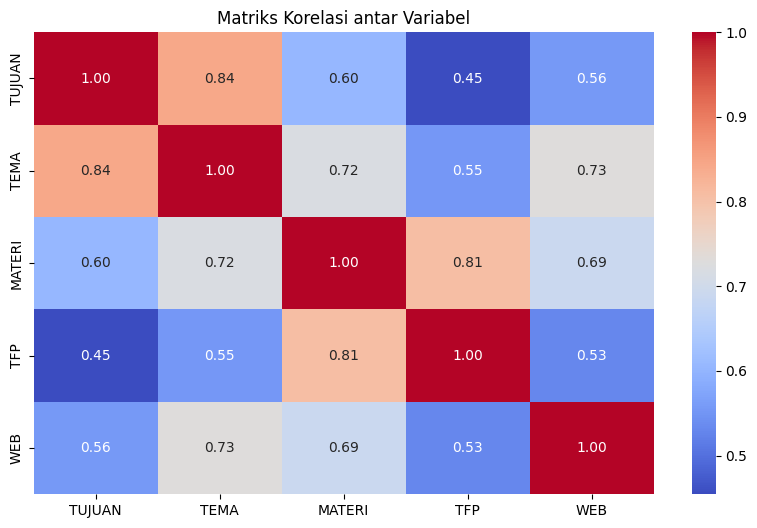

{('TUJUAN', 'TUJUAN'): 'Sangat kuat',
 ('TEMA', 'TUJUAN'): 'Sangat kuat',
 ('MATERI', 'TUJUAN'): 'Kuat',
 ('TFP', 'TUJUAN'): 'Sedang',
 ('WEB', 'TUJUAN'): 'Sedang',
 ('TUJUAN', 'TEMA'): 'Sangat kuat',
 ('TEMA', 'TEMA'): 'Sangat kuat',
 ('MATERI', 'TEMA'): 'Kuat',
 ('TFP', 'TEMA'): 'Sedang',
 ('WEB', 'TEMA'): 'Kuat',
 ('TUJUAN', 'MATERI'): 'Kuat',
 ('TEMA', 'MATERI'): 'Kuat',
 ('MATERI', 'MATERI'): 'Sangat kuat',
 ('TFP', 'MATERI'): 'Sangat kuat',
 ('WEB', 'MATERI'): 'Kuat',
 ('TUJUAN', 'TFP'): 'Sedang',
 ('TEMA', 'TFP'): 'Sedang',
 ('MATERI', 'TFP'): 'Sangat kuat',
 ('TFP', 'TFP'): 'Sangat kuat',
 ('WEB', 'TFP'): 'Sedang',
 ('TUJUAN', 'WEB'): 'Sedang',
 ('TEMA', 'WEB'): 'Kuat',
 ('MATERI', 'WEB'): 'Kuat',
 ('TFP', 'WEB'): 'Sedang',
 ('WEB', 'WEB'): 'Sangat kuat'}

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung matriks korelasi antar variabel
correlation_matrix = data.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi antar Variabel")
plt.show()

# Fungsi untuk interpretasi koefisien korelasi
def interpret_correlation(correlation_matrix):
    interpretations = {}
    for column in correlation_matrix.columns:
        for index in correlation_matrix.index:
            value = correlation_matrix.loc[index, column]
            if abs(value) < 0.20:
                interpretation = "Sangat lemah"
            elif abs(value) < 0.40:
                interpretation = "Lemah"
            elif abs(value) < 0.60:
                interpretation = "Sedang"
            elif abs(value) < 0.80:
                interpretation = "Kuat"
            else:
                interpretation = "Sangat kuat"

            interpretations[(index, column)] = interpretation
    return interpretations

# Menampilkan interpretasi korelasi
correlation_interpretation = interpret_correlation(correlation_matrix)

# Menampilkan hasil interpretasi korelasi
correlation_interpretation


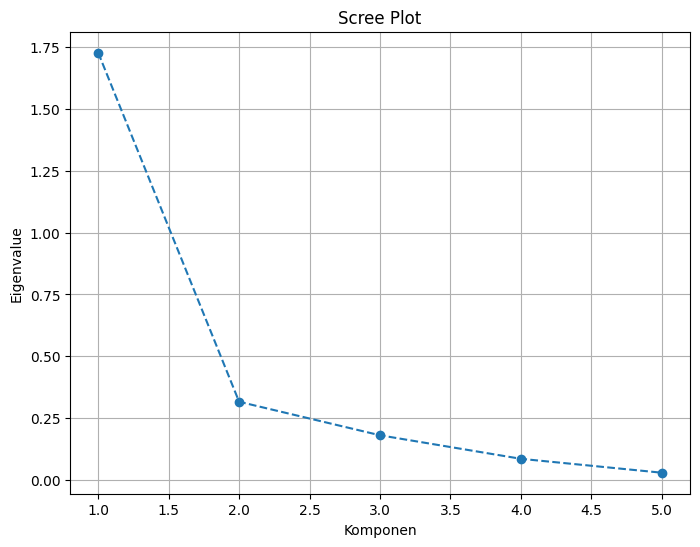

(array([1.72620406, 0.31629767, 0.1808957 , 0.08584089, 0.02965864]), 1)

In [19]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Menggunakan PCA untuk menghitung eigenvalue
pca = PCA()
pca.fit(data)

# Menampilkan eigenvalue (varians yang dijelaskan oleh setiap komponen)
eigenvalues = pca.explained_variance_

# Menampilkan jumlah komponen yang dipilih berdasarkan eigenvalue > 1
num_factors = np.sum(eigenvalues > 1)

# Visualisasi Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Komponen')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# Output eigenvalue dan interpretasi
eigenvalues, num_factors


In [20]:
from sklearn.decomposition import PCA
import pandas as pd

# Menentukan jumlah faktor berdasarkan eigenvalue > 1
num_factors = (eigenvalues > 1).sum()

# Ekstraksi faktor dengan jumlah faktor yang ditentukan
pca = PCA(n_components=num_factors)
factors = pca.fit_transform(data)

# Menampilkan faktor yang diekstraksi
factors_df = pd.DataFrame(factors, columns=[f"Factor {i+1}" for i in range(num_factors)])

# Menampilkan 5 baris pertama hasil ekstraksi faktor
factors_df.head()

# Interpretasi Faktor
def interpret_factors(pca, num_factors):
    interpretations = {}

    # Melihat komponen utama yang diekstraksi (loadings)
    component_loadings = pca.components_

    for i in range(num_factors):
        # Ambil loading komponen untuk faktor ke-i
        loading = component_loadings[i]

        # Interpretasi: Mengidentifikasi variabel yang paling berpengaruh pada faktor
        influential_variables = [data.columns[j] for j in range(len(loading)) if abs(loading[j]) > 0.5]

        # Menyusun interpretasi
        interpretations[f"Factor {i+1}"] = {
            "Explained Variance": pca.explained_variance_ratio_[i],
            "Influential Variables": influential_variables,
            "Loading Values": loading
        }

    return interpretations

# Mendapatkan interpretasi untuk faktor yang diekstraksi
factor_interpretations = interpret_factors(pca, num_factors)

# Menampilkan hasil interpretasi faktor
factor_interpretations


{'Factor 1': {'Explained Variance': 0.7380419464577437,
  'Influential Variables': ['MATERI', 'WEB'],
  'Loading Values': array([0.26364572, 0.31820934, 0.560306  , 0.43023794, 0.57461835])}}

**1. Explained Variance: 0.7380419464577437**

Makna: Faktor pertama menjelaskan sekitar 73.8% dari total varians yang ada dalam data. Ini menunjukkan bahwa Faktor 1 memiliki kontribusi yang besar dalam menggambarkan struktur data, karena semakin besar nilai varians yang dijelaskan, semakin penting faktor tersebut.

Interpretasi:
Faktor 1 adalah komponen utama yang paling signifikan dalam data Anda dan dapat dianggap sebagai dimensi utama yang menggerakkan sebagian besar variasi dalam data.

**2. Influential Variables: ['MATERI', 'WEB']**

Makna: Variabel-variabel yang paling berpengaruh dalam membentuk Faktor 1 adalah MATERI dan WEB.

Interpretasi:
Variabel-variabel ini memiliki pengaruh yang besar terhadap faktor ini. Dalam konteks modul ajar, ini bisa berarti bahwa kualitas Materi dan Web memainkan peran utama dalam menentukan faktor yang paling penting dalam varians data.

**3. Loading Values: array([0.26364572, 0.31820934, 0.560306 , 0.43023794, 0.57461835])**

Makna: Ini adalah nilai loading (beban) untuk setiap variabel dalam Faktor 1. Nilai-nilai ini menunjukkan kontribusi setiap variabel terhadap faktor yang diekstraksi.
MATERI (nilai loading: 0.2636)
WEB (nilai loading: 0.5746)
Variabel lainnya (nilai loading masing-masing: 0.3182, 0.5603, 0.4302)

Interpretasi:
Nilai loading yang lebih tinggi menunjukkan bahwa variabel tersebut memiliki kontribusi yang lebih besar terhadap faktor. Dalam hal ini, WEB memiliki pengaruh yang lebih besar pada Faktor 1 dibandingkan dengan variabel lainnya, yang terlihat dari nilai loading-nya yang paling tinggi (0.5746).
MATERI juga berkontribusi, tetapi dengan nilai loading yang lebih rendah (0.2636). Hal ini menunjukkan bahwa meskipun MATERI mempengaruhi faktor ini, pengaruhnya tidak sebesar WEB.

**Kesimpulan Umum:**

> Faktor 1 menjelaskan sebagian besar varians dalam data (73.8%), dan faktor ini sangat dipengaruhi oleh MATERI dan WEB.
WEB adalah variabel yang paling berpengaruh dalam faktor ini, sedangkan MATERI memiliki pengaruh yang lebih kecil namun tetap signifikan.
Dengan demikian, dalam analisis modul ajar atau skala penilaian lainnya, MATERI dan WEB mungkin menjadi dua aspek yang perlu mendapatkan perhatian lebih, karena keduanya memiliki kontribusi yang signifikan terhadap kualitas modul ajar secara keseluruhan.




In [27]:
# Dataframe untuk melihat loading semua variabel
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=[f"Factor {i+1}" for i in range(num_factors)],
    index=data.columns
)

# Menampilkan loading TUJUAN, TEMA, dan TFP
selected_variables = ['TUJUAN', 'TEMA', 'TFP']
selected_loadings = loadings_df.loc[selected_variables]

# Menampilkan nilai loading
print("Loading Values for TUJUAN, TEMA, and TFP:")
print(selected_loadings)

# Interpretasi Loading
print("\nInterpretation:")
threshold = 0.5  # Threshold untuk menentukan loading signifikan
for variable in selected_variables:
    print(f"\n{variable}:")
    for factor, loading in selected_loadings.loc[variable].items():
        if abs(loading) >= threshold:
            print(f"  - Significantly contributes to {factor} (loading = {loading:.2f}).")
        else:
            print(f"  - Does not significantly contribute to {factor} (loading = {loading:.2f}).")


Loading Values for TUJUAN, TEMA, and TFP:
        Factor 1
TUJUAN  0.263646
TEMA    0.318209
TFP     0.430238

Interpretation:

TUJUAN:
  - Does not significantly contribute to Factor 1 (loading = 0.26).

TEMA:
  - Does not significantly contribute to Factor 1 (loading = 0.32).

TFP:
  - Does not significantly contribute to Factor 1 (loading = 0.43).


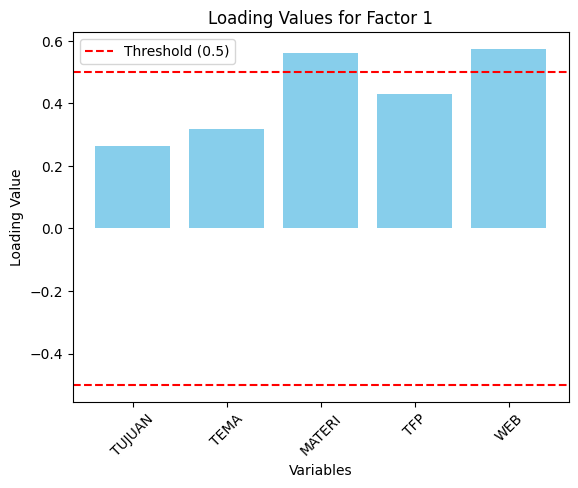


Interpretation for Factor 1:
  - TUJUAN does not significantly contribute to Factor 1 (loading = 0.26).
  - TEMA does not significantly contribute to Factor 1 (loading = 0.32).
  - MATERI significantly contributes to Factor 1 (loading = 0.56).
  - TFP does not significantly contribute to Factor 1 (loading = 0.43).
  - WEB significantly contributes to Factor 1 (loading = 0.57).


In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Visualisasi loading value dan interpretasi
threshold = 0.5  # Threshold untuk menentukan loading signifikan

for i in range(num_factors):
    factor_name = f"Factor {i+1}"
    loadings = loadings_df[factor_name]

    # Plot loading values
    plt.bar(loadings_df.index, loadings, color='skyblue')
    plt.title(f"Loading Values for {factor_name}")
    plt.axhline(threshold, color='red', linestyle='--', label='Threshold (0.5)')
    plt.axhline(-threshold, color='red', linestyle='--')
    plt.xlabel('Variables')
    plt.ylabel('Loading Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

    # Interpretasi loading
    print(f"\nInterpretation for {factor_name}:")
    for variable, loading in loadings.items():
        if abs(loading) >= threshold:
            print(f"  - {variable} significantly contributes to {factor_name} (loading = {loading:.2f}).")
        else:
            print(f"  - {variable} does not significantly contribute to {factor_name} (loading = {loading:.2f}).")


In [33]:
# Kontribusi varians setiap variabel
variance_contribution = (pca.components_ ** 2).sum(axis=0)

# Buat dataframe kontribusi varians
variance_df = pd.DataFrame({
    'Variable': data.columns,
    'Variance Contribution': variance_contribution
}).sort_values(by='Variance Contribution', ascending=False)

# Menampilkan kontribusi varians untuk semua variabel
print("Variance Contribution for All Variables:")
print(variance_df)

# Interpretasi kontribusi varians
threshold = 0.1  # Threshold untuk kontribusi signifikan
print("\nInterpretation:")
for _, row in variance_df.iterrows():
    variable = row['Variable']
    variance = row['Variance Contribution']
    if variance >= threshold:
        print(f"  - {variable} contributes significantly to the overall variance (variance contribution = {variance:.4f}).")
    else:
        print(f"  - {variable} has a low contribution to the overall variance (variance contribution = {variance:.4f}).")


Variance Contribution for All Variables:
  Variable  Variance Contribution
4      WEB               0.330186
2   MATERI               0.313943
3      TFP               0.185105
1     TEMA               0.101257
0   TUJUAN               0.069509

Interpretation:
  - WEB contributes significantly to the overall variance (variance contribution = 0.3302).
  - MATERI contributes significantly to the overall variance (variance contribution = 0.3139).
  - TFP contributes significantly to the overall variance (variance contribution = 0.1851).
  - TEMA contributes significantly to the overall variance (variance contribution = 0.1013).
  - TUJUAN has a low contribution to the overall variance (variance contribution = 0.0695).


In [34]:
# Deskripsi statistik untuk semua kategori
categories = ['TUJUAN', 'TEMA', 'MATERI', 'TFP', 'WEB']
description = data[categories].describe()

# Menampilkan deskripsi statistik
print("Statistical Description for All Categories:")
print(description)

# Interpretasi deskripsi statistik
print("\nInterpretation:")
for category in categories:
    mean_value = description.loc['mean', category]
    std_dev = description.loc['std', category]
    min_value = description.loc['min', category]
    max_value = description.loc['max', category]

    print(f"Category: {category}")
    print(f"  - Mean score: {mean_value:.2f}")
    print(f"  - Standard deviation: {std_dev:.2f}")
    print(f"  - Minimum score: {min_value}")
    print(f"  - Maximum score: {max_value}")

    # Interpretasi berdasarkan mean
    if mean_value >= 4.0:
        print(f"  - The average score for {category} is high, indicating strong performance or satisfaction.")
    elif mean_value >= 3.0:
        print(f"  - The average score for {category} is moderate, indicating room for improvement.")
    else:
        print(f"  - The average score for {category} is low, indicating significant issues that need attention.")

    print("")


Statistical Description for All Categories:
          TUJUAN       TEMA     MATERI        TFP        WEB
count  53.000000  53.000000  53.000000  53.000000  53.000000
mean    4.641509   4.603774   2.792453   1.471698   2.056604
std     0.484146   0.493793   0.793204   0.696247   0.864138
min     4.000000   4.000000   2.000000   1.000000   1.000000
25%     4.000000   4.000000   2.000000   1.000000   1.000000
50%     5.000000   5.000000   3.000000   1.000000   2.000000
75%     5.000000   5.000000   3.000000   2.000000   3.000000
max     5.000000   5.000000   4.000000   3.000000   3.000000

Interpretation:
Category: TUJUAN
  - Mean score: 4.64
  - Standard deviation: 0.48
  - Minimum score: 4.0
  - Maximum score: 5.0
  - The average score for TUJUAN is high, indicating strong performance or satisfaction.

Category: TEMA
  - Mean score: 4.60
  - Standard deviation: 0.49
  - Minimum score: 4.0
  - Maximum score: 5.0
  - The average score for TEMA is high, indicating strong performance or sat

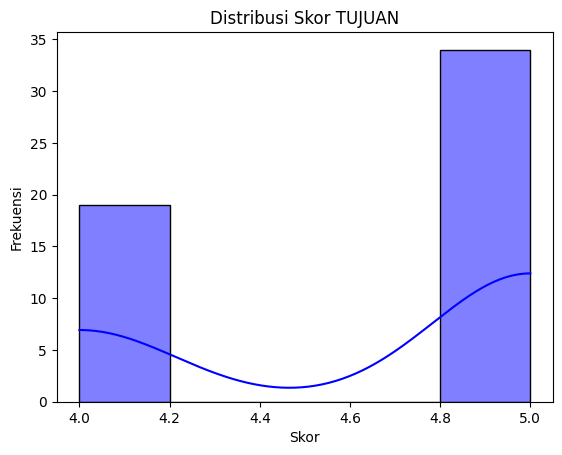

Interpretasi untuk TUJUAN:
  - Mean score: 4.64
  - Standard deviation: 0.48
  - Minimum score: 4
  - Maximum score: 5
  - Distribusi skor untuk TUJUAN menunjukkan skor rata-rata yang tinggi, menunjukkan kinerja atau kepuasan yang baik.




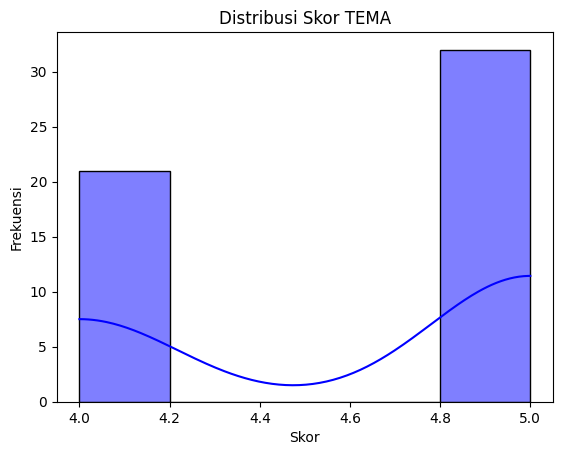

Interpretasi untuk TEMA:
  - Mean score: 4.60
  - Standard deviation: 0.49
  - Minimum score: 4
  - Maximum score: 5
  - Distribusi skor untuk TEMA menunjukkan skor rata-rata yang tinggi, menunjukkan kinerja atau kepuasan yang baik.




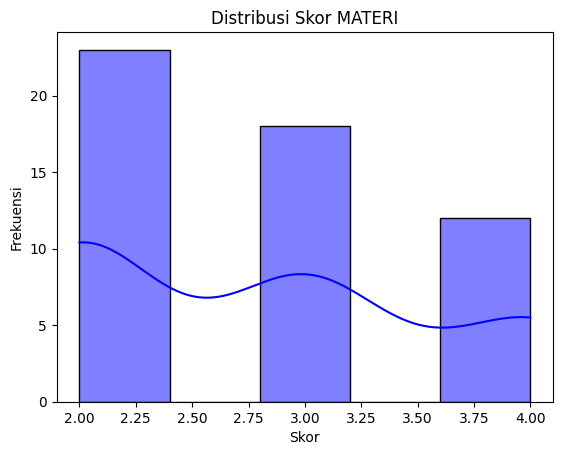

Interpretasi untuk MATERI:
  - Mean score: 2.79
  - Standard deviation: 0.79
  - Minimum score: 2
  - Maximum score: 4
  - Distribusi skor untuk MATERI menunjukkan skor rata-rata yang rendah, menunjukkan adanya masalah yang perlu diperhatikan.




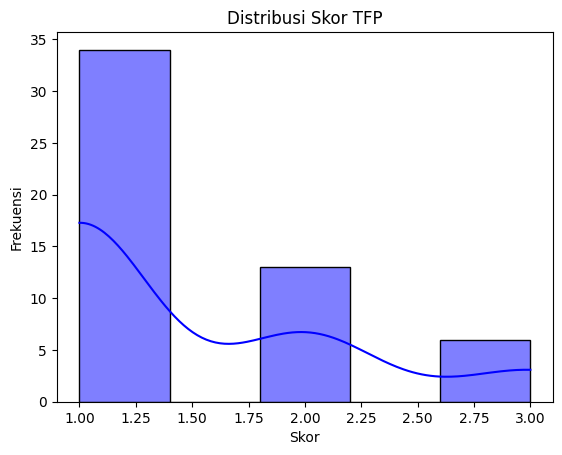

Interpretasi untuk TFP:
  - Mean score: 1.47
  - Standard deviation: 0.70
  - Minimum score: 1
  - Maximum score: 3
  - Distribusi skor untuk TFP menunjukkan skor rata-rata yang rendah, menunjukkan adanya masalah yang perlu diperhatikan.




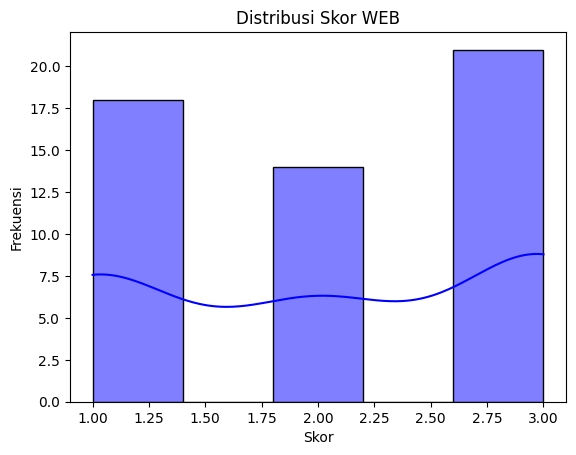

Interpretasi untuk WEB:
  - Mean score: 2.06
  - Standard deviation: 0.86
  - Minimum score: 1
  - Maximum score: 3
  - Distribusi skor untuk WEB menunjukkan skor rata-rata yang rendah, menunjukkan adanya masalah yang perlu diperhatikan.




In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar kategori untuk dianalisis
categories = ['TUJUAN', 'TEMA', 'MATERI', 'TFP', 'WEB']

# Plot distribusi skor dan interpretasi
for category in categories:
    # Plot distribusi
    sns.histplot(data[category], bins=5, kde=True, color='blue')
    plt.title(f'Distribusi Skor {category}')
    plt.xlabel('Skor')
    plt.ylabel('Frekuensi')
    plt.show()

    # Interpretasi distribusi
    mean_value = data[category].mean()
    std_dev = data[category].std()
    min_value = data[category].min()
    max_value = data[category].max()

    print(f"Interpretasi untuk {category}:")
    print(f"  - Mean score: {mean_value:.2f}")
    print(f"  - Standard deviation: {std_dev:.2f}")
    print(f"  - Minimum score: {min_value}")
    print(f"  - Maximum score: {max_value}")

    # Interpretasi berdasarkan distribusi
    if mean_value >= 4.0:
        print(f"  - Distribusi skor untuk {category} menunjukkan skor rata-rata yang tinggi, menunjukkan kinerja atau kepuasan yang baik.")
    elif mean_value >= 3.0:
        print(f"  - Distribusi skor untuk {category} menunjukkan skor rata-rata yang moderat, ada ruang untuk perbaikan.")
    else:
        print(f"  - Distribusi skor untuk {category} menunjukkan skor rata-rata yang rendah, menunjukkan adanya masalah yang perlu diperhatikan.")

    print("\n")
